In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
from btree import BplusTree,shakedown
from random import randint,random,seed,shuffle

# B-tree: an introduction.

B-trees are a family of data structures which are popular for storing large data sets. 

They excel whenever an algorithm utilizes large, slow memory access combined with small, fast memory access.
Some easy examples are disk and RAM, RAM an cache, and others.

How does one store information on a computer so that its possible to beat $O(N)$ lookup?

One common way is the *hash table*, which performs with $O(1)$, but requires $O(N)$ overhead, or additional space to access the memory. Requiring 2-3 times the disk space as overhead is prohibitive for databases.

Another possibility is using trees, which under the right circumstances, perform as $O(\log(N)$

## Simple trees

Binary trees are an intuitive way to construct a tree. Here's an example of a binary tree:

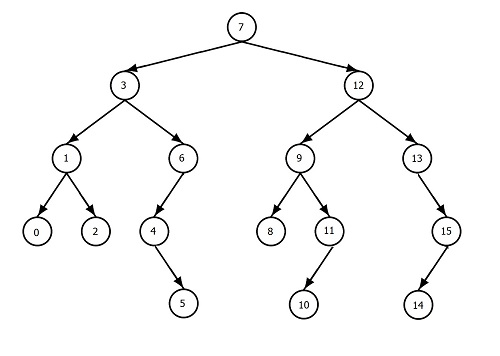

In [2]:
Image('img/binary.jpeg')

Looking for lower values implies moving left, looking for higher implies going right.

Say I'm looking the element labeled by 5.
Start by looking at 7.
5 < 7 so go right.
Keep comparing the goal to the current spot and move left or right accordingly.

Insertions proceed in the same way except placing the new data at the bottom of the tree.

Some things to note about this tree as I've presented it:
* Each move eliminates roughly half the entries, suggests log timing.
* Some branches are longer than others, so take more time to search.

The second point is important if you want $O(log_2(N))$ lookups. 
If I follow this algorithm and insert data one at a time, in order, the entire tree will be one branch and requires $N$ operations to look up the largest value.

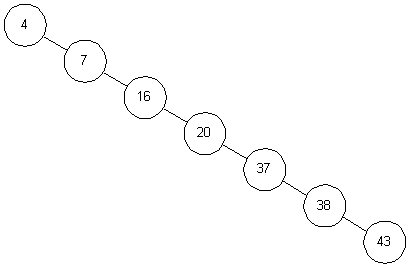

In [3]:
Image('img/unbalanced.gif')

## B-tree definitions

B-trees are a family of trees that maintain the following properties:
* Every non-leaf, non-root node has between $m/2$ and $m$ children. $m$ is an adjustable parameter.
* The root has at least two children if it is not a leaf.
* All leaves appear at the same level.

By adhering to these rules, the trees look something like this:

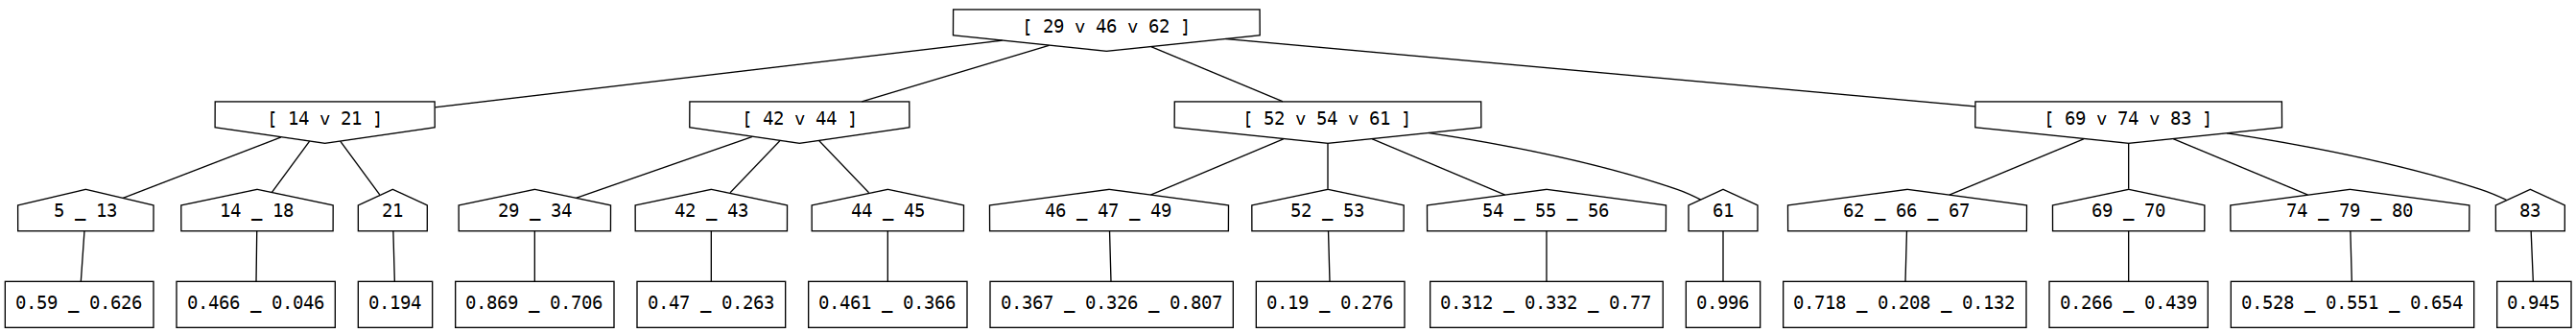

In [4]:
Image('img/example.png')

## Queries 

The way you traverse the tree is similar to a binary tree.
* Start at root, it has an array of keys.
* Find the smallest key that is larger than your data. 
* Go to the child that left of that key.
* Continue until finding the key that you search for.

The timing for this process is $O(m\log_m(N))$.

This tree has $m = 3$. 

Often $m$ is chosen to be compatible with secondary memory sizes.

For instance, when disk drives read a disk, it often reads it in blocks, typically of size 512 to 4096 bytes.
If $m$ is set to 512 bytes (for example), then a node can be read in one disk read, and operations within a node take place with faster RAM access.

This particular tree is popular variant called the B+tree. 

The key features of the B+tree are that:
* Data is only contained in leaves.
* Leaf keys are copied into internal nodes.
* Leaf nodes are linked for serial access.

# B+tree algorithm.

There are three main tasks for the tree.
* Queries (covered in last section)
* Insertions.
* Deletions.

## Insertions

Insertions proceed with a similar process to the queries. 
Once the spot is located, the constraints of the tree must be enforced.

If a leaf finds its self with $ > m$ keys, it splits along its median and adds a key to its parent.

This add may require a split from the parent. That proceeds in a similar fashion.

If the root splits, it makes a new root.

Here's an example of a bunch of random insertions building up a tree.

In [5]:
# Some initialization.
seed(10) # Just in case!!
tree = BplusTree(maxsize=6)
ans = {}

About to insert 136,0.924
Shakedown!


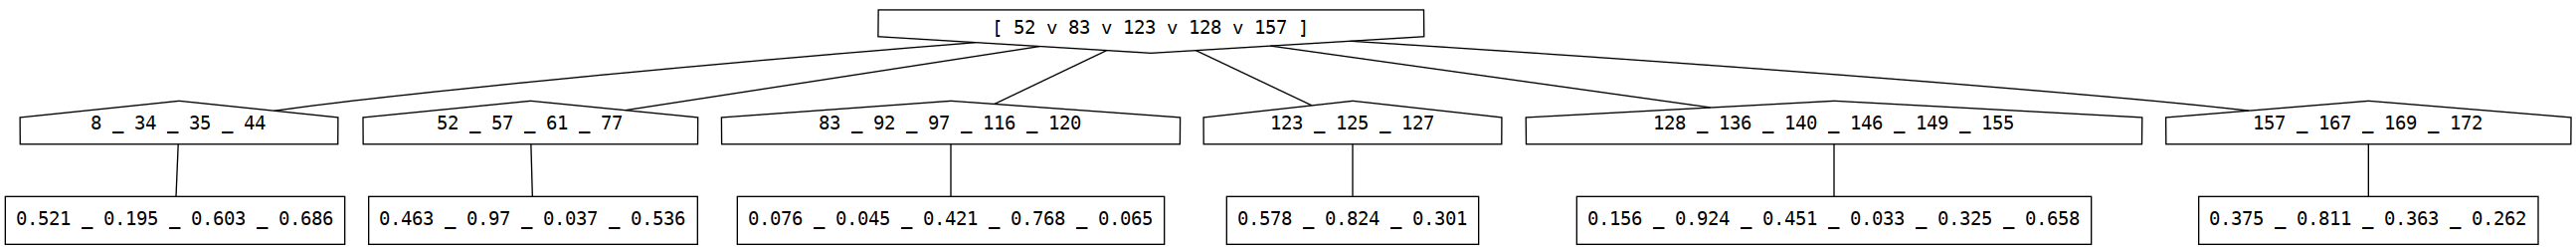

In [34]:
# Run this box as many times as you like!
key = randint(0,tree.maxsize*30)
val = round(random(),3)
ans[key] = val 

print("About to insert {},{}".format(key,val))
tree.insert(key,val)
tree.make_pydot_graph('img/insert')
shakedown(tree,ans) # This checks that all insertions are queried successfully.
Image('img/insert.png')

## Aside: serial access to data.

One of the reasons to use a B+tree over other B-tree types is that having all the data at the leaf level allows serial access to data.

For many types of data formats (trees, hashes), this is actually quite difficult. For B+tree its $O(N)$.

In [35]:
tree.serialize()

array([0.521, 0.195, 0.603, 0.686, 0.463, 0.97 , 0.037, 0.536, 0.076,
       0.045, 0.421, 0.768, 0.065, 0.578, 0.824, 0.301, 0.156, 0.924,
       0.451, 0.033, 0.325, 0.658, 0.375, 0.811, 0.363, 0.262])

## Deletions.

Deletions have a few more cases.

Once again, we descend to the appropriate leaf node.

Upon removing the key and data, check that the node is larger than $m/2$.

(Note: I used integer division for the min size. It's actually slighly better to use `ceil`, but I wasn't about to re-debug my code for that...)

If the node size is too small:
* Look at siblings. If sibilings are larger than the min size, rotate keys/data to self.
* If both sibilings are min size as well, combine with one of them and remove key from parent.
* Removing the key from parent may propagate deletions.

Here's a demo of deltions from a tree:

Shakedown!


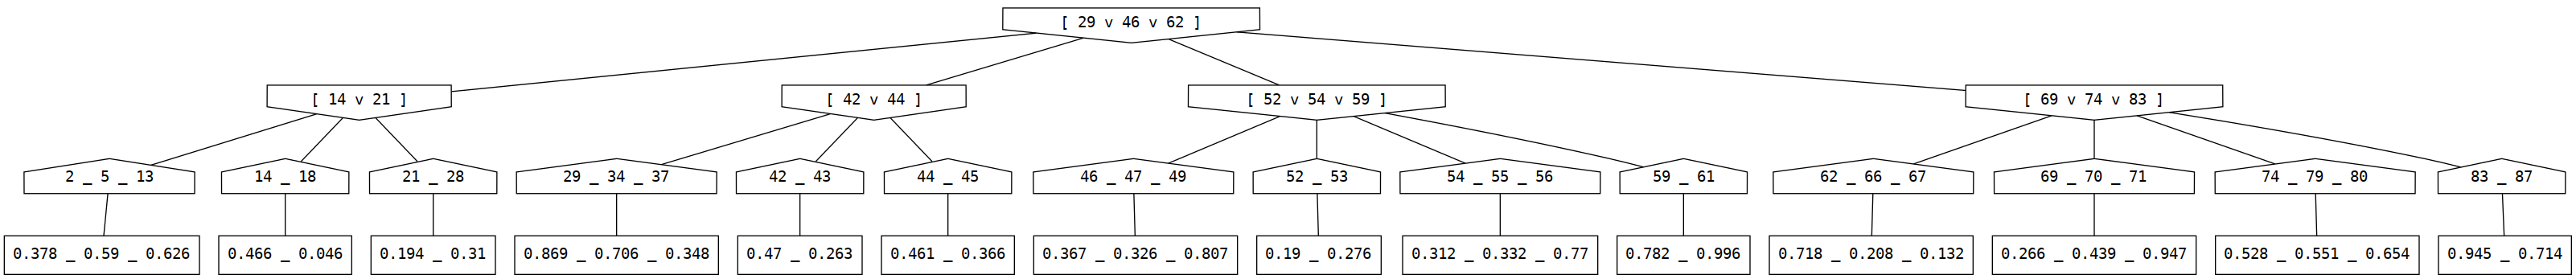

In [36]:
# First build the tree.
size = 3
ninsert = 40
seed(1023)
tree = BplusTree(size)
ans = {}
for i in range(ninsert):
    key = randint(0,size*30)
    val = round(random(),3)
    ans[key] = val
    tree.insert(key,val)

shakedown(tree,ans)
tree.make_pydot_graph('img/remove')

# Mix things up!
keys = list(ans.keys())
shuffle(keys)
kx = 0

Image('img/remove.png')

About to remove 18
Shakedown!


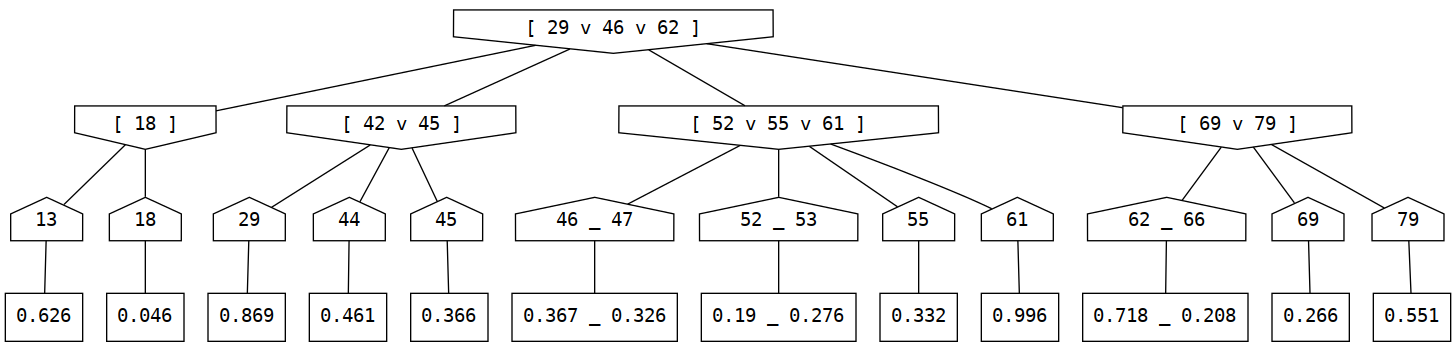

In [56]:
print("About to remove {}".format(key))

ans.pop(keys[kx])
tree.remove(keys[kx])
tree.make_pydot_graph('img/remove')
shakedown(tree,ans)
kx += 1
Image('img/remove.png')

# References

* Wikipedia for B-tree and B+tree.
* http://www.cburch.com/cs/340/reading/btree/index.html
* Bertram Ludäscher's Database class (ECS 165A) UC Davis, 2012.